# Data info

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # viz
import seaborn as sns # better viz
import numpy as np # numerical python
df=pd.read_csv("Energy Production Dataset.csv")

In [2]:
#%pip install matplotlib seaborn

In [3]:
df.head()

,Date,Start_Hour,End_Hour,Source,Day_of_Year,Day_Name,Month_Name,Season,Production
0,11/30/2025,21,22,Wind,334,Sunday,November,Fall,5281
1,11/30/2025,18,19,Wind,334,Sunday,November,Fall,3824
2,11/30/2025,16,17,Wind,334,Sunday,November,Fall,3824
3,11/30/2025,23,0,Wind,334,Sunday,November,Fall,6120
4,11/30/2025,6,7,Wind,334,Sunday,November,Fall,4387


In [4]:
df.columns

Index(['Date', 'Start_Hour', 'End_Hour', 'Source', 'Day_of_Year', 'Day_Name',
       'Month_Name', 'Season', 'Production'],
      dtype='object')

# Separate numeric and categorical Columns

In [5]:
num = df.select_dtypes(include="number") 
cat = df.select_dtypes(exclude="number")

In [6]:
num.shape

(51864, 4)

In [7]:
cat.shape

(51864, 5)

In [8]:
num.head()

,Start_Hour,End_Hour,Day_of_Year,Production
0,21,22,334,5281
1,18,19,334,3824
2,16,17,334,3824
3,23,0,334,6120
4,6,7,334,4387


In [9]:
cat

,Date,Source,Day_Name,Month_Name,Season
0,11/30/2025,Wind,Sunday,November,Fall
1,11/30/2025,Wind,Sunday,November,Fall
2,11/30/2025,Wind,Sunday,November,Fall
3,11/30/2025,Wind,Sunday,November,Fall
4,11/30/2025,Wind,Sunday,November,Fall
...,...,...,...,...,...
51859,1/1/2020,Wind,Wednesday,January,Winter
51860,1/1/2020,Wind,Wednesday,January,Winter
51861,1/1/2020,Wind,Wednesday,January,Winter
51862,1/1/2020,Solar,Wednesday,January,Winter


In [10]:
num.describe()

,Start_Hour,End_Hour,Day_of_Year,Production
count,51864.000000,51864.000000,51864.000000,51864.000000
mean,11.500000,11.500000,180.798415,6215.069933
std,6.922253,6.922253,104.291387,3978.364965
min,0.000000,0.000000,1.000000,58.000000
25%,5.750000,5.750000,91.000000,3111.000000
50%,11.500000,11.500000,181.000000,5372.000000
75%,17.250000,17.250000,271.000000,8501.000000
max,23.000000,23.000000,366.000000,23446.000000


In [11]:
round(num.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Start_Hour,51864.0,11.50,6.92,0.0,5.75,11.5,17.25,23.0
End_Hour,51864.0,11.50,6.92,0.0,5.75,11.5,17.25,23.0
Day_of_Year,51864.0,180.80,104.29,1.0,91.00,181.0,271.00,366.0
Production,51864.0,6215.07,3978.36,58.0,3111.00,5372.0,8501.00,23446.0


# Bivariated

## Categorical vs Categorical



### Source × Season

Business questions:

 - Is wind or solar more prevalent in certain seasons?
 - Is the energy mix seasonal?

In [12]:
ct_source_season = pd.crosstab(df["Season"], df["Source"])
ct_source_season

Source,Mixed,Solar,Wind
Season,,,
Fall,0,1961,11149
Spring,1,2547,10694
Summer,1,4172,9075
Winter,0,698,11566


In [13]:
# Create the contingency table with row percentages
ct_source_season_pct = (
    pd.crosstab(df["Season"], df["Source"], normalize="index") * 100
)

ct_source_season_pct

Source,Mixed,Solar,Wind
Season,,,
Fall,0.000000,14.958047,85.041953
Spring,0.007552,19.234255,80.758194
Summer,0.007548,31.491546,68.500906
Winter,0.000000,5.691455,94.308545


Wind energy dominates production in all seasons, while solar exhibits strong seasonality. Solar contribution peaks in summer (~31%) and drops sharply in winter (~6%), with spring and fall showing intermediate levels. This pattern reflects expected climatic effects and indicates a complementary relationship between wind and solar. The “Mixed” category is negligible and does not materially affect the energy mix.

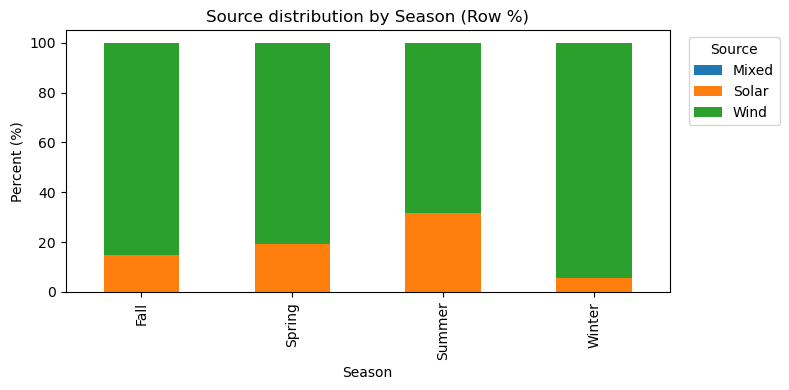

In [14]:
ax = ct_source_season_pct.plot(kind="bar", stacked=True, figsize=(8,4))
plt.title("Source distribution by Season (Row %)")
plt.xlabel("Season")
plt.ylabel("Percent (%)")
plt.legend(title="Source", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

The stacked bar chart visually confirms a seasonally varying energy mix, with wind providing a stable baseline year-round and solar contributing significantly during summer months. The inverse seasonal behavior of wind and solar highlights their complementarity and supports a diversified energy portfolio to ensure consistent production across seasons.

### Source × Month_Name

Business questions:
 - Does the dominant energy source change across months?

### Day_Name × Season

Business questions
 - Are weekdays/weekends evenly distributed across seasons?

# Categorical vs Continuous

### Source × Production (TOP PRIORITY)

##### Wind vs Solar performance

Business questions:
 - Which source produces more on average?
 - Which is more variable?
 - Which has higher peak production?

In [15]:
source_stats = df.groupby("Source")["Production"].agg(["count","mean","median","std","min","max"])
source_stats

,count,mean,median,std,min,max
Source,,,,,,
Mixed,2,1737.000000,1737.0,1418.456203,734,2740
Solar,9378,5793.845703,5500.5,2412.676179,267,16578
Wind,42484,6308.262593,5317.5,4241.262338,58,23446


The comparison of production by energy source shows that wind energy delivers higher average and peak production than solar, but with substantially greater variability. Solar energy exhibits lower volatility and a higher minimum production level, indicating more consistent output. These results suggest that wind offers higher upside potential, while solar provides greater production stability. The negligible number of “Mixed” observations prevents meaningful interpretation of that category.

<Figure size 700x300 with 0 Axes>

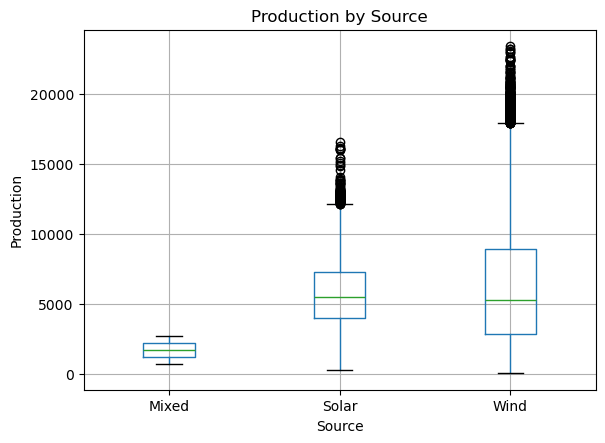

In [16]:
plt.figure(figsize=(7,3))
df.boxplot(column="Production", by="Source")
plt.title("Production by Source")
plt.suptitle("")  # removes default pandas subtitle
plt.xlabel("Source")
plt.ylabel("Production")
plt.show()


Wind is a high-return, high-variability source and Solar is a more stable, lower-risk source

## Season × Production

Business questions
- Which seasons have highest production?
- How strong is seasonality?

In [17]:
season_stats = df.groupby("Season")["Production"].agg(["count","mean","median","std"])
season_stats

,count,mean,median,std
Season,,,,
Fall,13110,6266.110908,5422.5,4114.098733
Spring,13242,6425.497130,5764.0,3734.353627
Summer,13248,4911.191878,4295.0,3045.166818
Winter,12264,7341.794684,6487.0,4540.105149


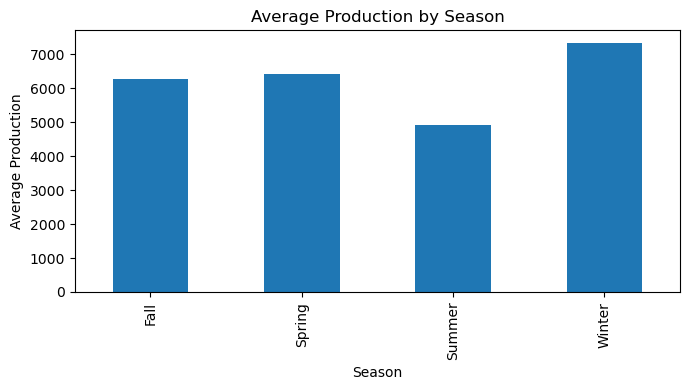

In [18]:
season_mean = df.groupby("Season")["Production"].mean()

plt.figure(figsize=(7,4))
season_mean.plot(kind="bar")
plt.title("Average Production by Season")
plt.xlabel("Season")
plt.ylabel("Average Production")
plt.tight_layout()
plt.show()

<Figure size 900x300 with 0 Axes>

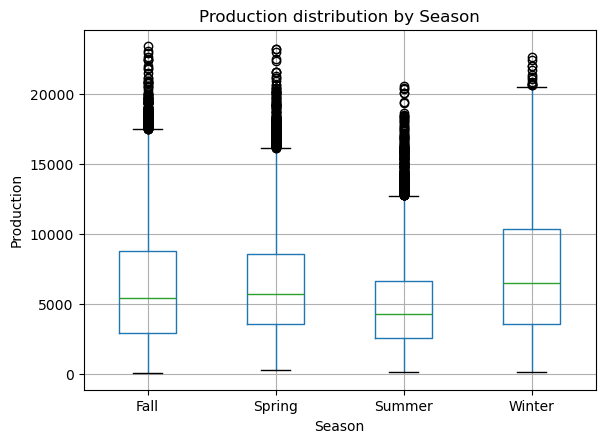

In [19]:
plt.figure(figsize=(9,3))
df.boxplot(column="Production", by="Season")
plt.title("Production distribution by Season")
plt.suptitle("")
plt.xlabel("Season")
plt.ylabel("Production")
plt.show()


Seasonal analysis of production shows a clear pattern, with winter exhibiting the highest average and median production levels, accompanied by greater variability. Summer displays the lowest production levels but also the lowest variability, indicating more stable output. Spring and fall represent intermediate cases with balanced performance. The consistency between mean and median values across seasons suggests that these differences are structural rather than driven by extreme outliers.

### Month_Name × Production

Business questions:
 - Are there monthly production cycles?
 - Which months drive annual output?

In [20]:
month_stats = df.groupby("Month_Name")["Production"].agg(["count","mean","median","std"])
month_stats

,count,mean,median,std
Month_Name,,,,
April,4320,6314.323843,5648.0,3678.631391
August,4464,4905.380376,4252.0,3186.577389
December,3720,7364.444355,6244.5,4782.216918
February,4080,7792.223775,7416.0,4015.284433
January,4464,6911.237455,5764.5,4740.611870
July,4464,5231.270385,4563.0,3244.527514
June,4320,4586.449306,4111.0,2619.081443
March,4458,7154.304172,6464.0,4147.400025
May,4464,5805.256720,5337.0,3189.501676


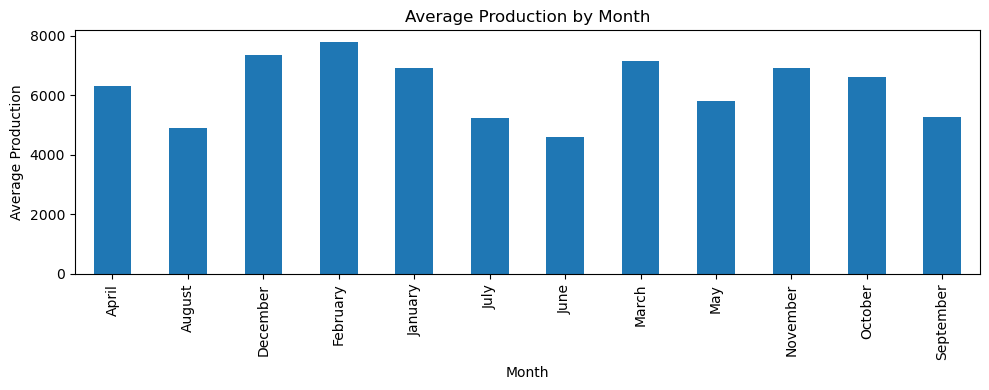

In [21]:
month_mean = df.groupby("Month_Name")["Production"].mean()

plt.figure(figsize=(10,4))
month_mean.plot(kind="bar")
plt.title("Average Production by Month")
plt.xlabel("Month")
plt.ylabel("Average Production")
plt.tight_layout()
plt.show()


### Start_Hour × Production

Business questions:
 - At what hours is production highest?
 - Do wind and solar have different daily profiles?

In [22]:
hour_stats = df.groupby("Start_Hour")["Production"].agg(["count","mean","median","std"])
hour_stats.head()

,count,mean,median,std
Start_Hour,,,,
0,2161,5313.696900,4307.0,3693.882487
1,2161,5208.010643,4131.0,3655.011003
2,2161,5087.774179,3997.0,3616.510237
3,2161,4972.211939,3930.0,3567.580540
4,2161,4884.647385,3804.0,3564.244448


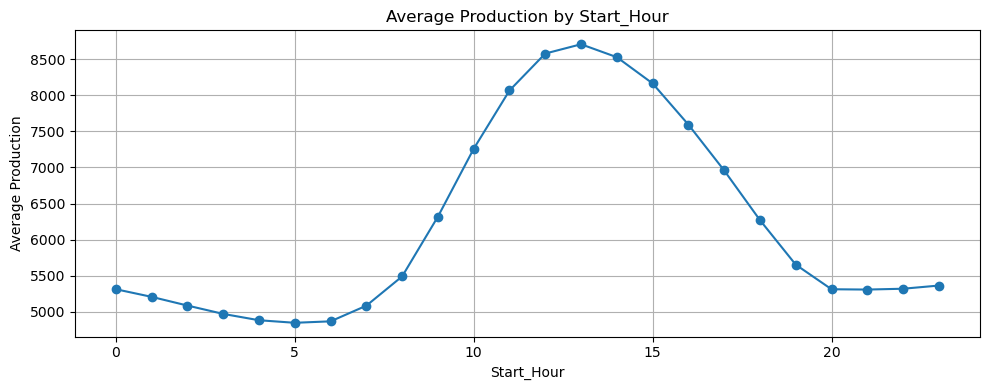

In [23]:
hour_mean = df.groupby("Start_Hour")["Production"].mean()

plt.figure(figsize=(10,4))
hour_mean.plot(kind="line", marker="o")
plt.title("Average Production by Start_Hour")
plt.xlabel("Start_Hour")
plt.ylabel("Average Production")
plt.grid(True)
plt.tight_layout()
plt.show()

### Day_Name × Production

Business questions:
 - Is production different on weekdays vs weekends?
 - Is output operationally constrained?

## Continuous vs Continuous


### Day_of_Year × Production

Business questions:
 - Is there a smooth annual production cycle?
 - Where are seasonal peaks?